In [1]:
# Importing Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
# Importing data
churn_data = pd.read_csv("Customer-Churn-Records.csv")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Checking number of unique values under "Geography"
churn_data.value_counts("Geography")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
# Dropping non-essential columns in reference to churn potential
churn_data = churn_data.drop(["RowNumber", "CustomerId", "Surname", "Geography"], axis=1)
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
# Finding the number of unique values in each column
churn_data.nunique()

CreditScore            460
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [6]:
# Looking at the value counts for "Tenure" for binning
tenure_vcounts = churn_data["Tenure"].value_counts()
tenure_vcounts

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [7]:
# Looking at value counts for "Satisfaction Score" for binning
satisfaction = churn_data["Satisfaction Score"].value_counts()
satisfaction

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [8]:
# Looking at value counts for "Credit Score" for binning
cred_score = churn_data["CreditScore"].value_counts()
cred_score

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [9]:
# Designating bins to group credit scores
bins = [299, 579, 669, 739, 799, 850]
churn_data["CreditScore"] = pd.cut(churn_data["CreditScore"], bins=bins, labels=["300-579", "580-669", "670-739", "740-799", "800-850"])

# Checking if binning was successful
churn_data["CreditScore"].value_counts()

CreditScore
580-669    3331
670-739    2428
300-579    2362
740-799    1224
800-850     655
Name: count, dtype: int64

In [10]:
bins = [0, 25000, 50000, 75000, 100000, 125000, 900000]
churn_data["EstimatedSalary"] = pd.cut(churn_data["EstimatedSalary"], bins=bins, labels=["0-25k", "25k-50k", "50k-75k", "75k-100k", "100k-125k", "125k+"])
churn_data["EstimatedSalary"].value_counts()

EstimatedSalary
125k+        3734
100k-125k    1276
50k-75k      1269
75k-100k     1268
25k-50k      1236
0-25k        1217
Name: count, dtype: int64

In [11]:
bins = [0, 25000, 50000, 75000, 100000, 125000, 900000]
churn_data["Balance"] = pd.cut(churn_data["Balance"], bins=bins, labels=["0-25k", "25k-50k", "50k-75k", "75k-100k", "100k-125k", "125k+"])
churn_data["Balance"].value_counts()

Balance
125k+        2731
100k-125k    2068
75k-100k     1160
50k-75k       349
25k-50k        69
0-25k           6
Name: count, dtype: int64

In [12]:
bins = [0, 20, 40, 60, 80, 200]
churn_data["Age"] = pd.cut(churn_data["Age"], bins=bins, labels=["0-20", "20-40", "40-60", "60-80", "80+"])
churn_data["Age"].value_counts()

Age
20-40    6330
40-60    3117
60-80     452
0-20       89
80+        12
Name: count, dtype: int64

In [13]:
# Converting categorical data to numeric with "pd.get_dummies"
# Probably need to sort out the credit score first since we are getting some individual credit score columns
numerics = pd.get_dummies(churn_data)
numerics

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Point Earned,CreditScore_300-579,CreditScore_580-669,...,EstimatedSalary_0-25k,EstimatedSalary_25k-50k,EstimatedSalary_50k-75k,EstimatedSalary_75k-100k,EstimatedSalary_100k-125k,EstimatedSalary_125k+,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,2,1,1,1,1,1,2,464,False,True,...,False,False,False,False,True,False,True,False,False,False
1,1,1,0,1,0,1,3,456,False,True,...,False,False,False,False,True,False,True,False,False,False
2,8,3,1,0,1,1,3,377,True,False,...,False,False,False,False,True,False,True,False,False,False
3,1,2,0,0,0,0,5,350,False,False,...,False,False,False,True,False,False,False,True,False,False
4,2,1,1,1,0,0,5,425,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1,300,False,False,...,False,False,False,True,False,False,True,False,False,False
9996,10,1,1,1,0,0,5,771,True,False,...,False,False,False,False,True,False,False,False,True,False
9997,7,1,0,1,1,1,3,564,False,False,...,False,True,False,False,False,False,False,False,False,True
9998,3,2,1,0,1,1,2,339,False,False,...,False,False,False,True,False,False,False,True,False,False


In [23]:
# Splitting preprocessed data into featured and target arrays
y = numerics["Exited"].values
x = numerics.drop("Exited", axis = 1).values
X = numerics.drop("Exited", axis=1)

# Getting the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
# Creating StandardScaler instances
scaler = StandardScaler()

# Fitting StandardScaler
x_scaler = scaler.fit(x_train)

# Scaling data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(x_train[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 19

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

C:\Users\rashe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             324 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(x_train_scaled, y_train, epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7904 - loss: 0.4936
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9716 - loss: 0.1224
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9973 - loss: 0.0217
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9987 - loss: 0.0105
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9981 - loss: 0.0085
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9976 - loss: 0.0112
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9985 - loss: 0.0085
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9987 - loss: 0.0080
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9979 - loss: 0.0105
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9991 - loss: 0.0049
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9985 - loss: 0.0076
Epoch 12/100
235/23

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0606
Loss: 0.06061716377735138, Accuracy: 0.996399998664856


In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


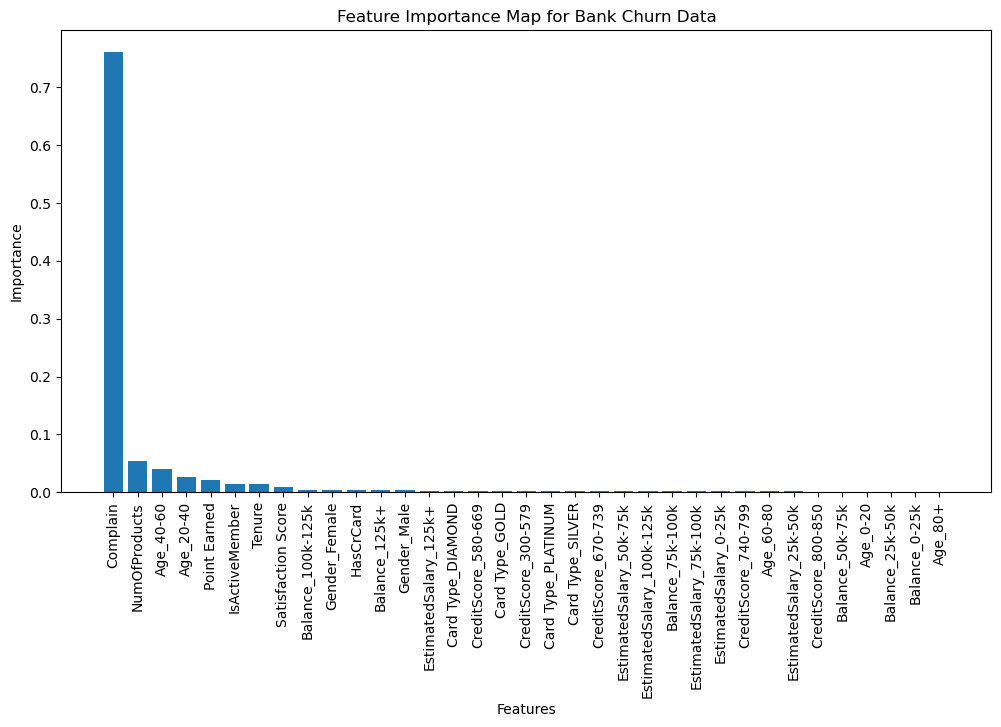

In [25]:
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize = (12,6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Map for Bank Churn Data")
plt.show()